In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [229]:
# reading the dataset
train = pd.read_csv("train.csv")

In [230]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [231]:
#head
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [232]:
#Data Ceaning
train.shape

(1460, 81)

In [233]:
#Deleting columns with more than 50% issing data - Alley, FireplaceQu, PoolQC, Fence, MiscFeature

train = train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)

In [234]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [235]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [236]:
train.LotFrontage.value_counts()


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       5
56.0       5
83.0       5
37.0       5
32.0       5
47.0       5
102.0      4
42.0       4
49.0       4
103.0      3
104.0      3
130.0      3
99.0       3
108.0      3
45.0       3
97.0       2

<AxesSubplot:xlabel='LotFrontage'>

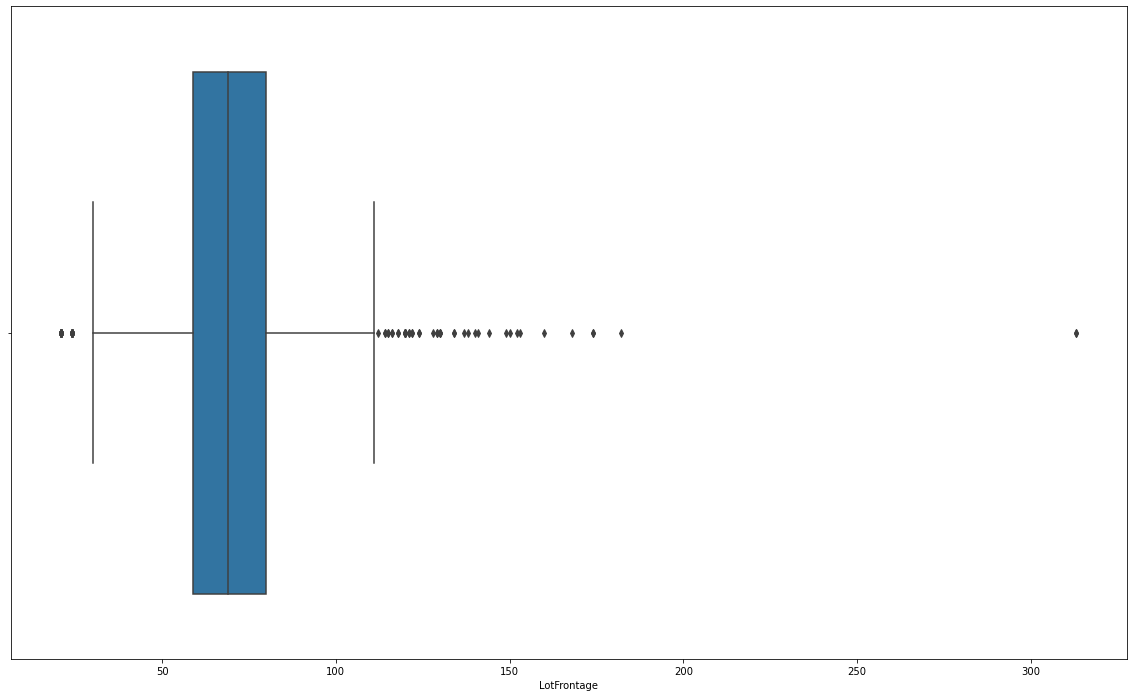

In [237]:
plt.figure(figsize=(20,12))
sns.boxplot(x='LotFrontage', data=train)

In [238]:
train.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       5
56.0       5
83.0       5
37.0       5
32.0       5
47.0       5
102.0      4
42.0       4
49.0       4
103.0      3
104.0      3
130.0      3
99.0       3
108.0      3
45.0       3
97.0       2

In [239]:
#Replain null values with median value of 69

train["LotFrontage"].fillna(69, inplace = True)

In [240]:
train_clean = train.dropna(how='any', axis=0)

In [241]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

In [242]:
train_clean.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

### Converting some binary variables (Yes/No) to 0/1

In [243]:
train_clean['Street'].value_counts()

Pave    1333
Grvl       5
Name: Street, dtype: int64

In [244]:
train_clean['CentralAir'].value_counts()

Y    1277
N      61
Name: CentralAir, dtype: int64

In [245]:
# List of variables to map Street, CentralAir
 
train_clean['Street'] = train_clean['Street'].replace({'Grvl': 1, "Pave": 0})


train_clean['CentralAir'] = train_clean['CentralAir'].replace({'Y': 1, "N": 0})


In [246]:
train_clean['Street'].value_counts()

0    1333
1       5
Name: Street, dtype: int64

In [247]:
train_clean['CentralAir'].value_counts()

1    1277
0      61
Name: CentralAir, dtype: int64

# Converting all variables with object type to int64 or float

#### 1 Identifyting incremental type of variables 

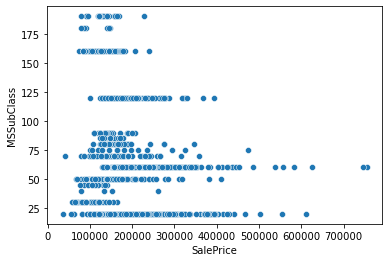

In [248]:
varlist = ['MSSubClass', 'OverallQual', 'OverallCond', ]
sns.scatterplot(y = train_clean['MSSubClass'], x = train_clean['SalePrice'])
plt.show()

In [249]:
train_clean['MSSubClass'].corr(train_clean['SalePrice'])

-0.0795985179007541

### 2. Ordered categorical variables 

In [250]:
# Following are ordered categorical variables: ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC','KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

#Replacing variables with Ex Gd TA Fa Po NA

ordered_varlist = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC','KitchenQual',  'GarageQual', 'GarageCond']

# Defining the map function
def binary_map(x):
    return x.map({'Ex': 6, "Gd": 5, 'TA':4, 'Fa':3, 'Po': 2, 'NA': 1})
# Applying the function to the housing list
train_clean[ordered_varlist] = train_clean[ordered_varlist].apply(binary_map)

In [251]:
train_clean['LotShape'] = train_clean['LotShape'].replace({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1 })

train_clean['LandContour'] = train_clean['LandContour'].replace({'Lv1': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1 })

train_clean['BsmtExposure'] = train_clean['BsmtExposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0 })

train_clean['BsmtFinType1'] = train_clean['BsmtFinType1'].replace({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 1, 'NA':0 })
train_clean['BsmtFinType2'] = train_clean['BsmtFinType2'].replace({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 1, 'NA':0 })


In [252]:
train_clean.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60       RL         65.0     8450       0         4   
1   2          20       RL         80.0     9600       0         4   
2   3          60       RL         68.0    11250       0         3   
3   4          70       RL         60.0     9550       0         3   
4   5          60       RL         84.0    14260       0         3   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          5          4      PConc         5         4   
1         0.0          4          4     CBlock         5         4   
2       162.0          5          4      PConc         5         4   
3         0.0          4          4     BrkTil         4         5   
4       350.0          5          4      PConc         5         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             5         706             1           0   
1             4             4         978             1           0   
2             2             5         486             1           0   
3             1             4         216             1           0   
4             3             5         655             1           0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  \
0        150          856    GasA          6           1      SBrkr       856   
1        284         1262    GasA          6           1      SBrkr      1262   
2        434          920    GasA          6           1      SBrkr       920   
3        540          756    GasA          5           1      SBrkr       961   
4        490         1145    GasA          6           1      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1            5             8        Typ   
1         0             3             1            4             6        Typ   
2         1             3             1            5             6        Typ   
3         0             3             1            5             7        Typ   
4         1             4             1            5             9  

In [253]:
train_clean.YrSold.value_counts()

2009    308
2007    306
2006    291
2008    273
2010    160
Name: YrSold, dtype: int64

In [254]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(train_clean[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour','Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition', 'MoSold']], drop_first=True)



In [255]:
# Adding the results to the master dataframe
train_clean1 = pd.concat([train_clean, dummy1], axis=1)

Dropping variables

In [256]:
train_clean1 = train_clean1.drop(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour','Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition', 'MoSold' ], 1)

## Data Inspection 

In [257]:
train_clean1.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0          2003       196.0          5          4         5         4   
1          1976         0.0          4          4         5         4   
2          2002       162.0          5          4         5         4   
3          1970         0.0          4          4         4         5   
4          2000       350.0          5          4         5         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             5         706             1           0   
1             4             4         978             1           0   
2             2             5         486             1           0   
3             1             4         216             1           0   
4             3             5         655             1           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  \
0        150          856          6           1       856       854   
1        284         1262          6           1      1262         0   
2        434          920          6           1       920       866   
3        540          756          5           1       961       756   
4        490         1145          6           1      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1            5             8           0   
1             3             1            4             6           1   
2             3             1            5             6           1   
3             3             1            5             7           1   
4             4             1            5             9           1   

   GarageYrBlt  GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  \
0       2003.0           2         548           4           4           0   
1       1976.0           2         460           4           4         298   
2       2001.0           2         608           4           4           0   
3       1998.0           3         642           4           4           0   
4       2000.0           3         836           4           4         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0     208500            0            0            1            0   
1     181500            0            0            1            0   
2     223500            0            0            1            0   
3     140000            0            0            1            0   
4     250000            0            0            1            0   

   LandContour_2  LandContour_3  LandContour_Lvl  Utilitie

### Examining Year variable to classify the correctly 

In [258]:
# 1 GarageYrBlt
train_clean1['GarageYrBlt'].value_counts()

2005.0    65
2006.0    58
2004.0    53
2003.0    47
2007.0    45
1977.0    33
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
1993.0    22
2002.0    22
1966.0    21
1965.0    21
1950.0    21
2009.0    21
1958.0    21
1970.0    20
1962.0    20
2001.0    20
1996.0    20
1997.0    19
1954.0    19
1974.0    18
1960.0    18
1978.0    18
1957.0    18
1995.0    18
1964.0    18
1994.0    18
1963.0    16
1959.0    16
1990.0    16
1980.0    15
1969.0    15
1973.0    14
1940.0    14
1972.0    14
1988.0    14
1920.0    14
1967.0    13
1971.0    13
1961.0    13
1956.0    13
1992.0    13
1953.0    12
1948.0    11
1955.0    11
1979.0    11
1981.0    10
1985.0    10
1925.0    10
1941.0    10
1989.0    10
1987.0    10
1939.0     9
1975.0     8
1991.0     8
1984.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1949.0     6
1922.0     5
1916.0     5
1936.0     5
1935.0     4
1931.0     4
1982.0     4
1928.0     4
1924.0     3
1938.0     3
2010.0     3

In [259]:
train_clean1['GarageYrBlt'].corr(train_clean1['SalePrice'])

0.48172978591824006

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

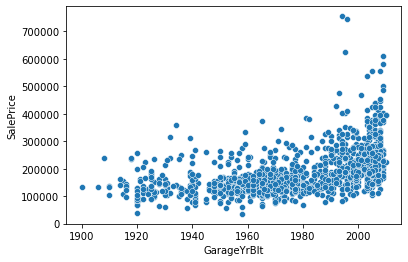

In [260]:
sns.scatterplot(y = train_clean1['SalePrice'], x = train_clean1['GarageYrBlt'])

Keeping variabe GarageYrBlt as it is perfect correlation with SalePrice and price is increasing ith year of built. This can be considered as continous variable

In [261]:
# 2 YearBuilt
train_clean1['YearBuilt'].value_counts()

2005    64
2006    63
2004    53
2007    46
2003    42
1976    33
1977    29
1920    25
1998    25
1999    25
2000    24
1954    23
1965    23
1958    23
2008    23
1959    22
1972    21
1970    21
1968    21
2002    20
2001    20
1994    18
1962    18
2009    18
1971    18
1966    18
1995    18
1957    17
1993    17
1960    16
1963    16
1967    15
1925    15
1996    15
1950    15
1964    15
1940    14
1969    14
1997    14
1978    14
1961    13
1992    13
1941    13
1948    13
1953    12
1910    12
1955    12
1956    12
1990    11
1988    11
1973    11
1980    10
1915     9
1984     9
1974     9
1939     8
1900     8
1936     8
1926     8
1930     7
1916     7
1975     7
1918     7
1928     7
1949     7
1951     6
1923     6
1921     6
1982     6
1979     6
1931     5
1924     5
1922     5
1937     5
1981     5
1986     5
1991     4
1985     4
1983     4
1880     4
1932     4
1946     4
1945     4
1938     4
1935     4
1929     4
1952     4
1914     3
1947     3
1989     3
1934     3

In [262]:
train_clean1['YearBuilt'].corr(train_clean1['SalePrice'])

0.5042971750930907

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

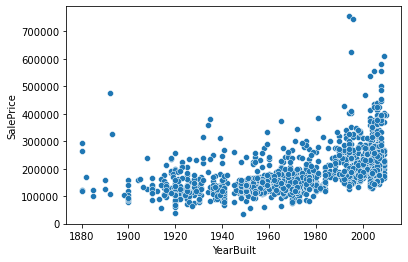

In [263]:
sns.scatterplot(y = train_clean1['SalePrice'], x = train_clean1['YearBuilt'])

Keeping variabe YearBuilt as it is perfect correlation with SalePrice and price is increasing ith year of built. This can be considered as continous variable

In [264]:
# 2 YearBuilt
train_clean1['YearRemodAdd'].value_counts()

1950    145
2006     90
2007     71
2005     71
2004     60
2000     53
2003     46
2002     44
2008     35
1998     35
1996     34
1976     30
1999     29
1995     28
1997     24
1970     24
2009     23
1977     22
1994     21
2001     20
1993     19
1972     18
1965     18
1992     16
1968     16
1971     14
1990     14
1978     14
1966     14
1959     14
1958     14
1969     13
1963     13
1962     13
1954     13
1991     13
1980     12
1960     12
1989     11
1964     11
1967     11
1973     11
1953     10
1987      9
1975      8
1988      8
1981      8
1957      8
1956      8
1985      8
1979      7
1984      7
1961      7
1955      6
1974      6
2010      6
1982      5
1983      5
1986      5
1951      4
1952      4
Name: YearRemodAdd, dtype: int64

YearRemodAdd have similar behavior like las two variables. Can be considered as contionous variable.

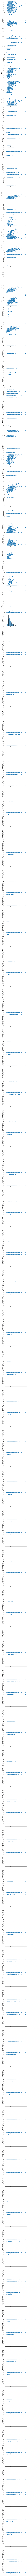

In [265]:
sns.pairplot(data=train_clean1, x_vars = 'SalePrice', aspect=2)

In [266]:
#Checking for missing values
train_clean1.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
G

In [267]:
#continous_vars = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice' ]

continous_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice' ]

df_contvar = train_clean1[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice' ]]

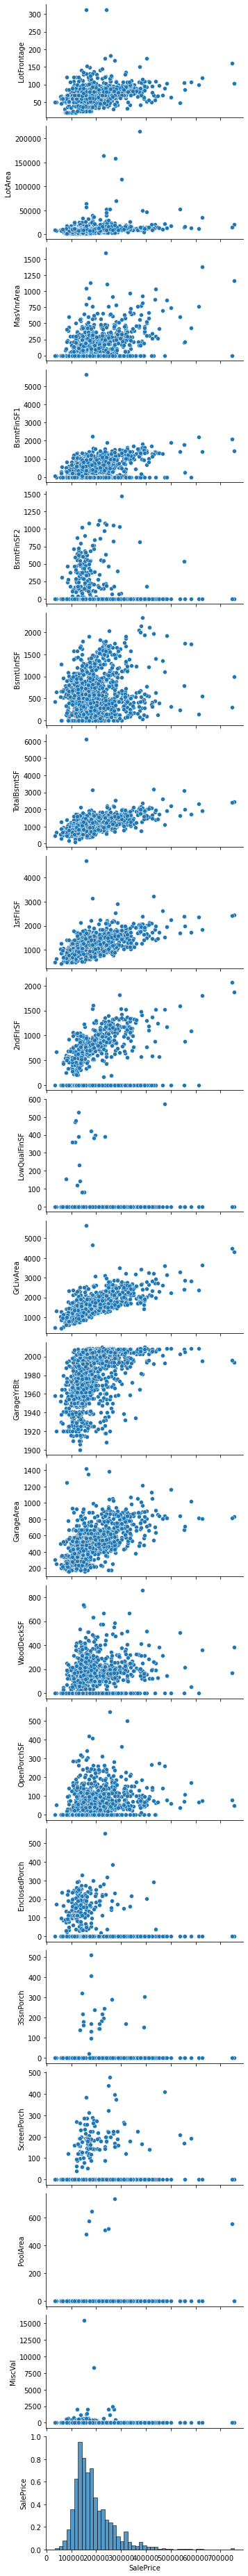

In [268]:
sns.pairplot(data=df_contvar, x_vars = 'SalePrice', aspect=2)

In [269]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_contvar.describe(percentiles=[.25, .5, .75, .90, .95, .99])

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1338.000000    1338.000000  1338.000000  1338.000000  1338.000000   
mean     70.438714   10706.294469   110.360239   464.234679    49.218236   
std      22.170305   10336.621126   185.604816   458.792420   166.196584   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7744.000000     0.000000     0.000000     0.000000   
50%      69.000000    9600.000000     0.000000   413.000000     0.000000   
75%      80.000000   11760.750000   174.000000   733.000000     0.000000   
90%      93.000000   14575.900000   340.000000  1079.900000   134.100000   
95%     105.000000   17508.850000   464.300000  1280.300000   412.350000   
99%     135.890000   39727.700000   808.600000  1593.790000   858.640000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000   
mean    582.494768  1095.947683  1176.221973   357.141256      4.221973   
std     439.950528   405.554435   386.644986   440.324982     40.712916   
min       0.000000   105.000000   438.000000     0.000000      0.000000   
25%     248.000000   819.750000   894.000000     0.000000      0.000000   
50%     489.000000  1021.500000  1098.000000     0.000000      0.000000   
75%     815.750000  1324.000000  1414.000000   740.500000      0.000000   
90%    1242.700000  1616.300000  1686.300000   975.600000      0.000000   
95%    1480.300000  1754.500000  1838.150000  1151.150000      0.000000   
99%    1798.150000  2156.150000  2220.780000  1405.860000    135.120000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  GarageYrBlt   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean   1537.585202  1978.596413   501.449925    99.384903    47.782511   
std     520.579960    24.773741   186.761863   127.537065    65.362562   
min     438.000000  1900.000000   160.000000     0.000000     0.000000   
25%    1160.000000  1962.000000   377.500000     0.000000     0.000000   
50%    1480.000000  1980.000000   484.000000     6.000000    28.000000   
75%    1791.500000  2002.000000   583.000000   174.500000    70.000000   
90%    2175.300000  2006.000000   772.600000   264.300000   130.000000   
95%    2485.300000  2007.000000   857.150000   342.300000   172.300000   
99%    3129.640000  2009.000000  1017.780000   510.260000   283.890000   
max    5642.000000  2010.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1338.000000  1338.000000   1338.00000  1338.000000   1338.000000   
mean       21.263827     3.585949     16.43423     3.010463     42.932735   
std        60.843964    30.224622     58.05159    41.961337    508.056255   
min         0.000000     0.000000      0.00000     0.000000      0.000000   
25%         0.000000     0.000000      0.00000     0.000000      0.000000   
50%         0.000000     0.000000      0.00000     0.000000      0.000000   
75%         0.000000     0.000000      0.00000     0.000000      0.000000   
90%       109.200000     0.000000      0.00000     0.000000      0.000000   
95%       180.450000     0.000000    168.00000     0.000000      0.000000   
99%       262.150000   168.000000    272.26000     0.000000    700.000000   
max       552.000000   508.000000    480.00000   738.000000  15500.000000   

           SalePrice  
count    1338.000000  
mean   186761.782511  
std     78913.847668  
min     35311.000000  
25%    135000.000000  
50%    168500.000000  
75%    220000.000000  
90%    283624.100000  
95%    335000.000000  
99%    443944.430000  
max    755000.000000

In [270]:
#Variables to be considered for removing outliers: 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'BsmtUnfSF', 'GrLivArea' , 'SalePrice'

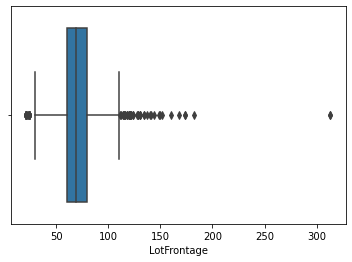

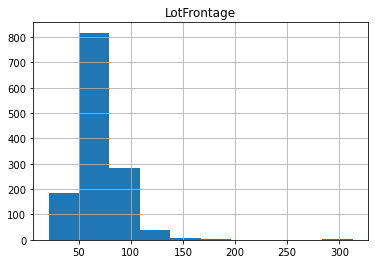

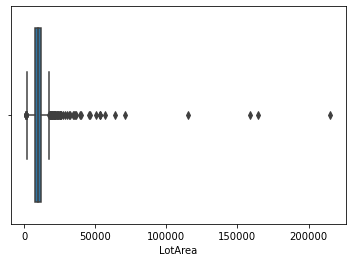

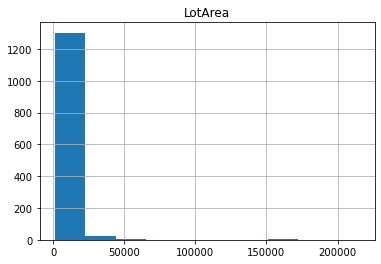

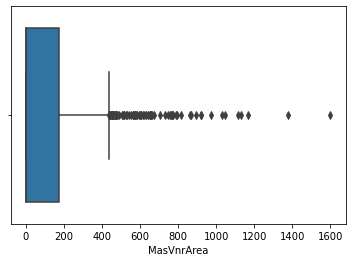

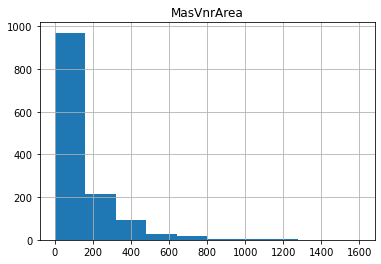

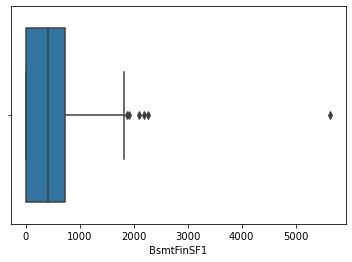

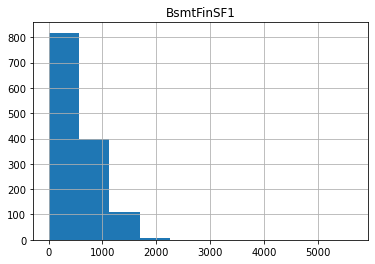

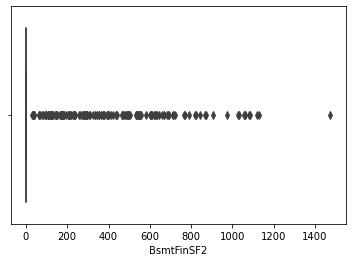

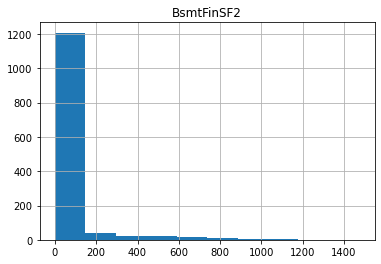

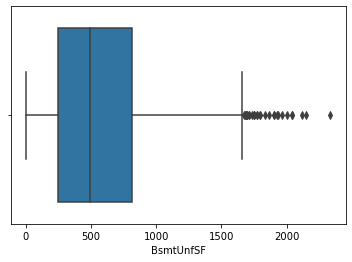

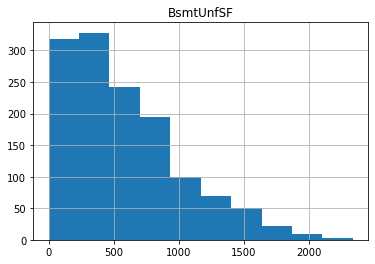

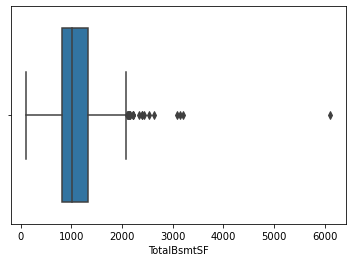

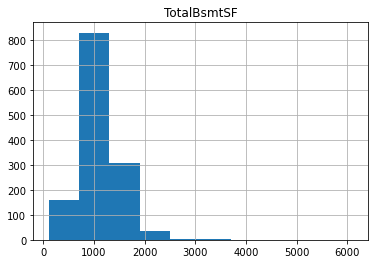

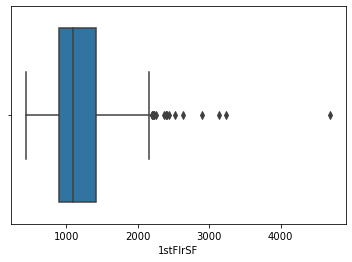

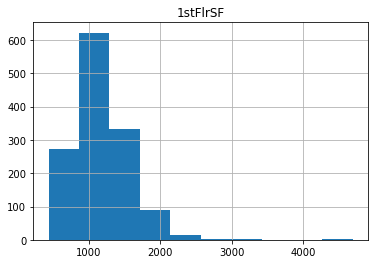

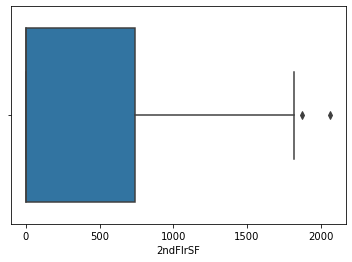

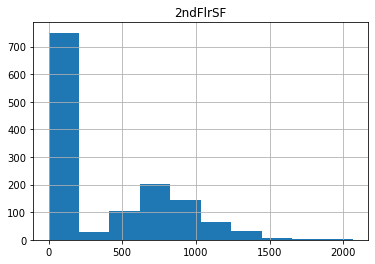

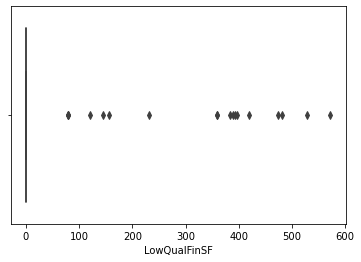

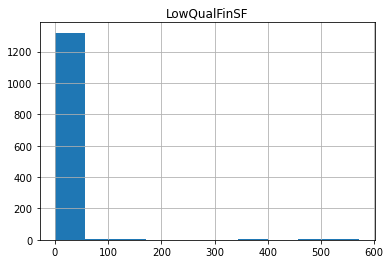

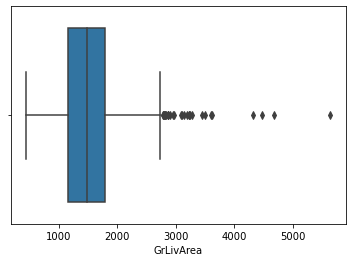

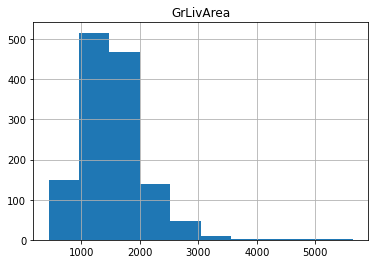

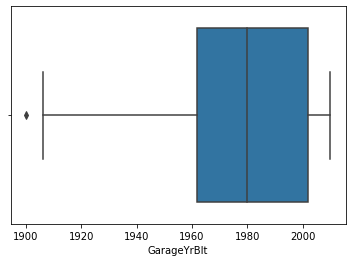

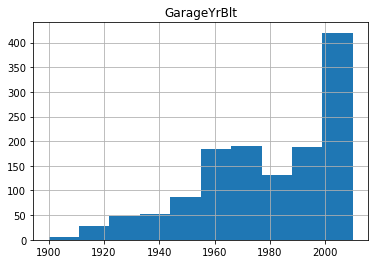

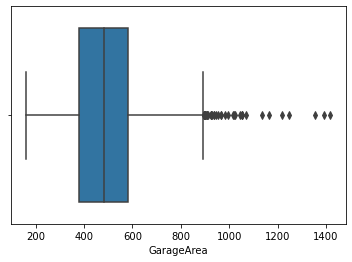

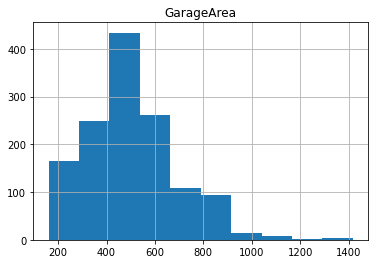

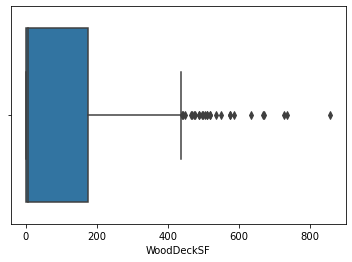

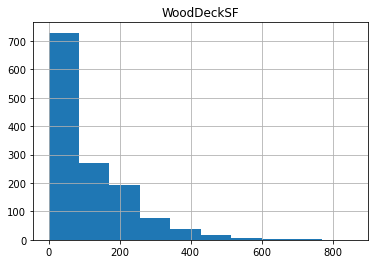

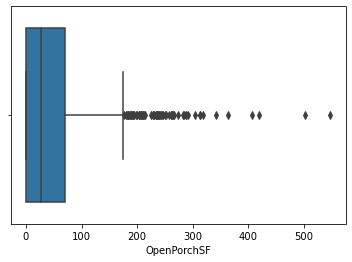

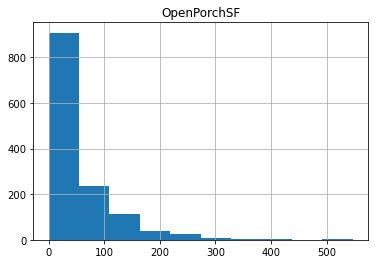

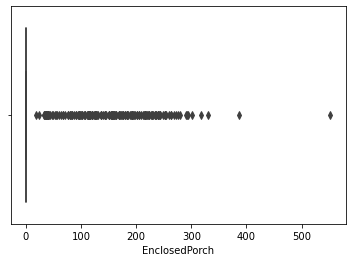

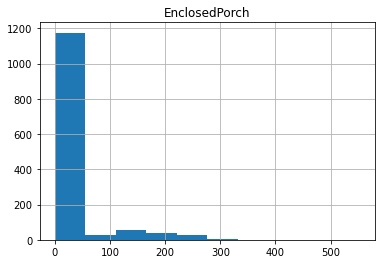

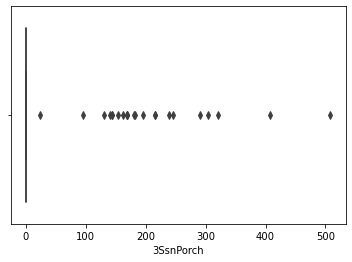

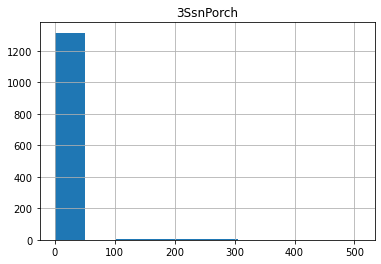

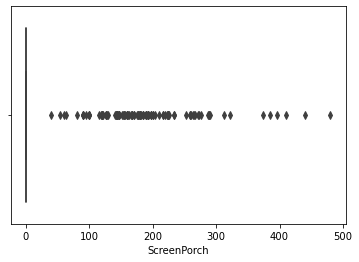

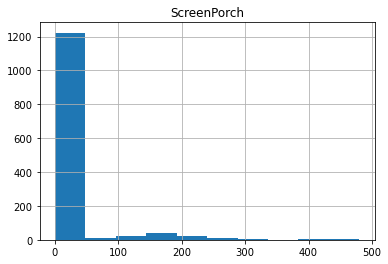

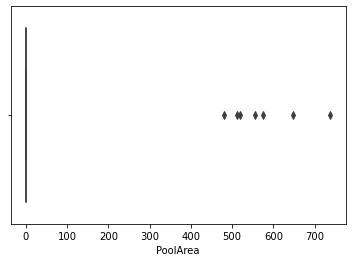

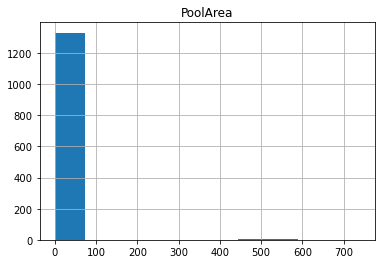

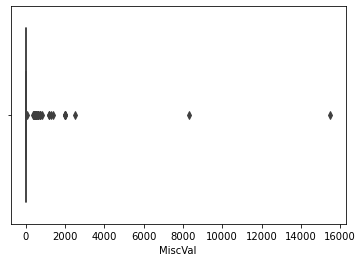

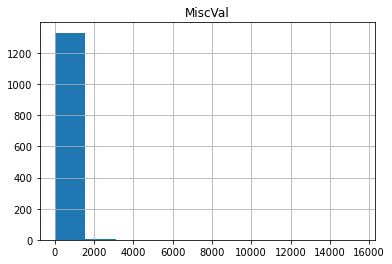

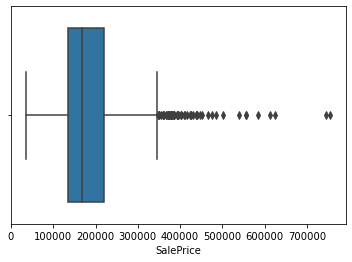

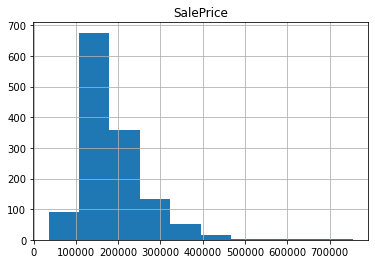

In [271]:
for x in continous_vars:
    sns.boxplot(x=train_clean1[x])
    plt.show()
    train_clean1.hist(column=[x])
    plt.show()
    

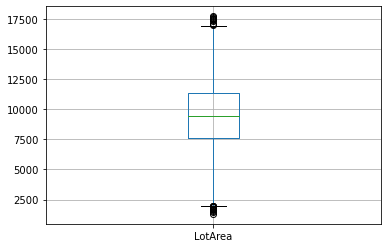

(1275, 193)


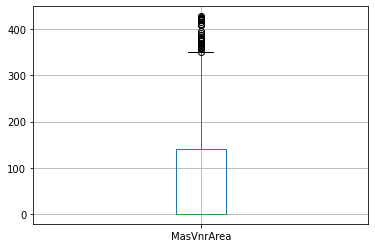

(1201, 193)


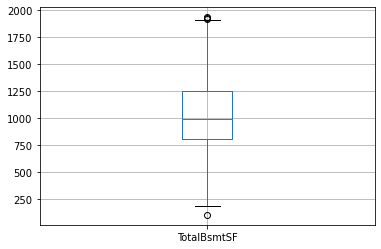

(1184, 193)


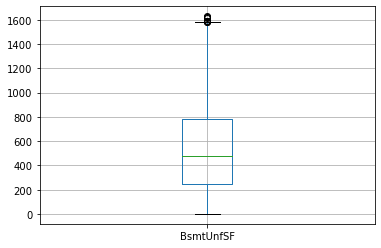

(1163, 193)


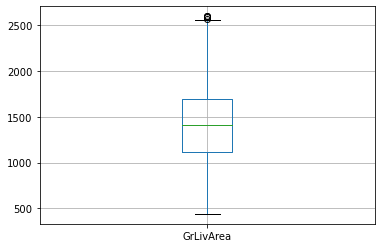

(1139, 193)


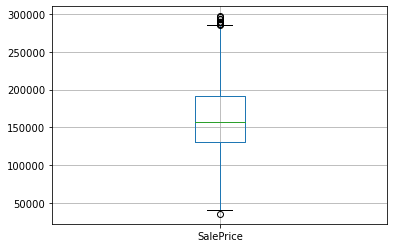

(1093, 193)


In [272]:
df_in = train_clean1

outlier_var =['LotArea', 'MasVnrArea', 'TotalBsmtSF', 'BsmtUnfSF', 'GrLivArea' , 'SalePrice']
for x in outlier_var:
    q1 = df_in[x].quantile(0.25)
    q3 = df_in[x].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_out = df_in.loc[(df_in[x] >= fence_low) & (df_in[x] < fence_high)]
    df_out = df_in.loc[(df_in[x] < fence_high)]
    df_out.boxplot(column=[x])
    plt.show()
    print(df_out.shape)
    df_in = df_out

In [273]:
df_out.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0          2003       196.0          5          4         5         4   
1          1976         0.0          4          4         5         4   
2          2002       162.0          5          4         5         4   
3          1970         0.0          4          4         4         5   
4          2000       350.0          5          4         5         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             5         706             1           0   
1             4             4         978             1           0   
2             2             5         486             1           0   
3             1             4         216             1           0   
4             3             5         655             1           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  \
0        150          856          6           1       856       854   
1        284         1262          6           1      1262         0   
2        434          920          6           1       920       866   
3        540          756          5           1       961       756   
4        490         1145          6           1      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1            5             8           0   
1             3             1            4             6           1   
2             3             1            5             6           1   
3             3             1            5             7           1   
4             4             1            5             9           1   

   GarageYrBlt  GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  \
0       2003.0           2         548           4           4           0   
1       1976.0           2         460           4           4         298   
2       2001.0           2         608           4           4           0   
3       1998.0           3         642           4           4           0   
4       2000.0           3         836           4           4         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0     208500            0            0            1            0   
1     181500            0            0            1            0   
2     223500            0            0            1            0   
3     140000            0            0            1            0   
4     250000            0            0            1            0   

   LandContour_2  LandContour_3  LandContour_Lvl  Utilitie

In [274]:
df_out.shape

(1093, 193)

## Train-Test Split

In [275]:
# Putting feature variable to X
X = df_out.drop(['SalePrice','Id'], axis=1)

X.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          5          4         5         4             1   
1         0.0          4          4         5         4             4   
2       162.0          5          4         5         4             2   
3         0.0          4          4         4         5             1   
4       350.0          5          4         5         4             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             5         706             1           0        150          856   
1             4         978             1           0        284         1262   
2             5         486             1           0        434          920   
3             4         216             1           0        540          756   
4             5         655             1           0        490         1145   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          6           1       856       854             0       1710   
1          6           1      1262         0             0       1262   
2          6           1       920       866             0       1786   
3          5           1       961       756             0       1717   
4          6           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0            5             8           0       2003.0           2         548   
1            4             6           1       1976.0           2         460   
2            5             6           1       2001.0           2         608   
3            5             7           1       1998.0           3         642   
4            5             9           1       2000.0           3         836   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           4           4           0           61              0          0   
1           4           4         298            0              0          0   
2           4           4           0           42              0          0   
3           4           4           0           35            272          0   
4           4           4         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0            0         0        0            0            0            1   
1            0         0        0            0            0            1   
2            0         0        0            0            0            1   
3            0         0        0            0            0            1   
4            0         0        0            0            0            1   

   MSZoning_RM  LandContour_2  LandContour_3  LandContour_Lvl  \
0            0              0              0                1   
1            0              0              0                1   
2            0              0              0                1 

In [276]:
# Putting response variable to y
y = df_out['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [277]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [278]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [279]:
X_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
298         90.0    11700            6            6       1968          1968   
580         69.0    14585            6            6       1960          1987   
911         69.0     9286            5            7       1977          1989   
733         80.0    10000            5            6       1961          1983   
631         34.0     4590            8            5       2006          2006   

     MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
298       365.0          5          4         4         4             1   
580        85.0          4          4         4         4             1   
911         0.0          4          4         5         5             3   
733         0.0          4          4         4         4             1   
631       108.0          5          4         5         5             2   

     BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
298             4         384             2         175        143   
580             3         594             2         219        331   
911             4         196             1           0       1072   
733             3         594             1           0        270   
631             5          24             1           0       1530   

     TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
298          702          5           1      1041       702             0   
580         1144          6           1      1429         0             0   
911         1268          4           1      1268         0             0   
733          864          6           1      1144         0             0   
631         1554          6           1      1554         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
298       1743             0             1         1         2             3   
580       1429             0             1         1         0             3   
911       1268             0             0         1         1             3   
733       1144             1             0         1         0             3   
631       1554             0             0         2         0             2   

     KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
298             1            4             7           1       1968.0   
580             1            5             7           2       1960.0   
911             1            5             5           0       1978.0   
733             1            4             6           1       1961.0   
631             1            5             6           1       2006.0   

     GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
298           2         539           4           4         224            0   
580           2         572           4           4         216          110   
911           1         252           4           4         173            0   
733           1         264           4           4         165            0   
631           2         627           4           4         156           73   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MSZoning_FV  \
298              0          0            0         0        0            0   
580              0          0            0         0        0            0   
911              0          0            0         0        0            0   
733              0          0            0         0      400            0   
631              0          0            0         0        0            0   

     MSZoning_RH  MSZoning_RL  MSZoning_RM  LandContour_2  LandContour_3  \
298            0            1            0              0              0   
580            0            1            0              0              0   
911            0            1            0              0              0   
733            

In [280]:
#Listing numerical variables

num_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [281]:
#col_list = X_train.columns.tolist()
#print(col_list)

X_train.describe()


LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  \
count   765.000000    765.000000   765.000000   765.000000   765.000000   
mean     67.457516   9084.196078     5.966013     5.654902  1970.095425   
std      17.932898   3110.835505     1.094439     1.072560    29.575974   
min      21.000000   1300.000000     2.000000     2.000000  1880.000000   
25%      60.000000   7259.000000     5.000000     5.000000  1954.000000   
50%      69.000000   9120.000000     6.000000     5.000000  1971.000000   
75%      75.000000  10927.000000     7.000000     6.000000  1999.000000   
max     182.000000  17671.000000     9.000000     9.000000  2009.000000   

       YearRemodAdd  MasVnrArea   ExterQual   ExterCond    BsmtQual  \
count    765.000000  765.000000  765.000000  765.000000  765.000000   
mean    1983.947712   66.488889    4.322876    4.092810    4.487582   
std       20.155349  106.019688    0.495067    0.340177    0.597915   
min     1950.000000    0.000000    3.000000    3.000000    3.000000   
25%     1967.000000    0.000000    4.000000    4.000000    4.000000   
50%     1991.000000    0.000000    4.000000    4.000000    4.000000   
75%     2003.000000  116.000000    5.000000    4.000000    5.000000   
max     2010.000000  425.000000    6.000000    6.000000    6.000000   

         BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2  \
count  765.000000    765.000000    765.000000   765.000000    765.000000   
mean     4.022222      1.583007      2.913725   418.945098      1.180392   
std      0.290833      0.976141      1.642971   376.723783      0.660305   
min      2.000000      1.000000      1.000000     0.000000      1.000000   
25%      4.000000      1.000000      1.000000     0.000000      1.000000   
50%      4.000000      1.000000      3.000000   400.000000      1.000000   
75%      4.000000      2.000000      5.000000   666.000000      1.000000   
max      5.000000      4.000000      5.000000  1567.000000      5.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF   HeatingQC  CentralAir  \
count   765.000000   765.000000   765.000000  765.000000  765.000000   
mean     50.569935   533.836601  1003.351634    5.108497    0.946405   
std     168.100597   381.511146   295.170065    0.942034    0.225364   
min       0.000000     0.000000   264.000000    2.000000    0.000000   
25%       0.000000   230.000000   796.000000    4.000000    1.000000   
50%       0.000000   463.000000   955.000000    5.000000    1.000000   
75%       0.000000   769.000000  1196.000000    6.000000    1.000000   
max    1127.000000  1626.000000  1844.000000    6.000000    1.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count   765.000000   765.000000    765.000000   765.000000    765.000000   
mean   1088.701961   326.741176      3.730719  1419.173856      0.423529   
std     294.609592   400.202767     36.288160   397.865713      0.504919   
min     438.000000     0.000000      0.000000   438.000000      0.000000   
25%     864.000000     0.000000      0.000000  1114.000000      0.000000   
50%    1050.000000     0.000000      0.000000  1382.000000      0.000000   
75%    1266.000000   708.000000      0.000000  1668.000000      1.000000   
max    2158.000000  1611.000000    481.000000  2601.000000      2.000000   

       BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  \
count    765.000000  765.000000  765.000000    765.000000    765.000000   
mean       0.062745    1.495425    0.363399      2.803922      1.031373   
std        0.247998    0.525818    0.499967      0.747236      0.181785   
min        0.000000    0.000000    0.000000      0.000000      1.000000   
25%        0.000000    1.000000    0.000000      2.000000      1.000000   
50%        0.000000    1.000000    0.000000      3.000000      1.000000   
75%        0.000000    2.000000    1.000000      3.000000      1.000000   
max        2.000000    3.000000    2.000000      6.000000      3.000000 

In [282]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [283]:
X_train.describe()

LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  \
count   765.000000  765.000000   765.000000   765.000000  765.000000   
mean      0.288556    0.475487     0.566573     0.522129    0.698414   
std       0.111384    0.190021     0.156348     0.153223    0.229271   
min       0.000000    0.000000     0.000000     0.000000    0.000000   
25%       0.242236    0.363997     0.428571     0.428571    0.573643   
50%       0.298137    0.477674     0.571429     0.428571    0.705426   
75%       0.335404    0.588052     0.714286     0.571429    0.922481   
max       1.000000    1.000000     1.000000     1.000000    1.000000   

       YearRemodAdd  MasVnrArea   ExterQual   ExterCond    BsmtQual  \
count    765.000000  765.000000  765.000000  765.000000  765.000000   
mean       0.565795    0.156444    0.440959    0.364270    0.495861   
std        0.335922    0.249458    0.165022    0.113392    0.199305   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.283333    0.000000    0.333333    0.333333    0.333333   
50%        0.683333    0.000000    0.333333    0.333333    0.333333   
75%        0.883333    0.272941    0.666667    0.333333    0.666667   
max        1.000000    1.000000    1.000000    1.000000    1.000000   

         BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
count  765.000000    765.000000    765.000000  765.000000    765.000000   
mean     4.022222      0.194336      0.478431    0.267355      0.045098   
std      0.290833      0.325380      0.410743    0.240411      0.165076   
min      2.000000      0.000000      0.000000    0.000000      0.000000   
25%      4.000000      0.000000      0.000000    0.000000      0.000000   
50%      4.000000      0.000000      0.500000    0.255265      0.000000   
75%      4.000000      0.333333      1.000000    0.425016      0.000000   
max      5.000000      1.000000      1.000000    1.000000      1.000000   

       BsmtFinSF2   BsmtUnfSF  TotalBsmtSF   HeatingQC  CentralAir  \
count  765.000000  765.000000   765.000000  765.000000  765.000000   
mean     0.044871    0.328313     0.467944    0.777124    0.946405   
std      0.149158    0.234632     0.186816    0.235508    0.225364   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.141451     0.336709    0.500000    1.000000   
50%      0.000000    0.284748     0.437342    0.750000    1.000000   
75%      0.000000    0.472940     0.589873    1.000000    1.000000   
max      1.000000    1.000000     1.000000    1.000000    1.000000   

         1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  \
count  765.000000  765.000000    765.000000  765.000000    765.000000   
mean     0.378315    0.202819      0.007756    0.453617      0.211765   
std      0.171285    0.248419      0.075443    0.183942      0.252459   
min      0.000000    0.000000      0.000000    0.000000      0.000000   
25%      0.247674    0.000000      0.000000    0.312529      0.000000   
50%      0.355814    0.000000      0.000000    0.436431      0.000000   
75%      0.481395    0.439479      0.000000    0.568655      0.500000   
max      1.000000    1.000000      1.000000    1.000000      1.000000   

       BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  \
count    765.000000  765.000000  765.000000    765.000000    765.000000   
mean       0.031373    0.498475    0.181699      0.467320      0.015686   
std        0.123999    0.175273    0.249984      0.124539      0.090893   
min        0.000000    0.000000    0.000000      0.000000      0.000000   
25%        0.000000    0.333333    0.000000      0.333333      0.000000   
50%        0.000000    0.333333    0.000000      0.500000      0.000000   
75%        0.000000    0.666667    0.500000      0.500000      0.000000   
max        1.000000    1.000000    1.000000      1.000000      1.000000   

       KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
coun

In [284]:
#Droping variables with 0 max value

X_test = X_test.drop(['Utilities_NoSeWa', 'LotConfig_FR3', 'Condition2_PosA', 'Condition2_PosN','Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn' ], 1)
X_train = X_train.drop(['Utilities_NoSeWa', 'LotConfig_FR3', 'Condition2_PosA', 'Condition2_PosN','Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn'], 1)

### Looking at correlations 

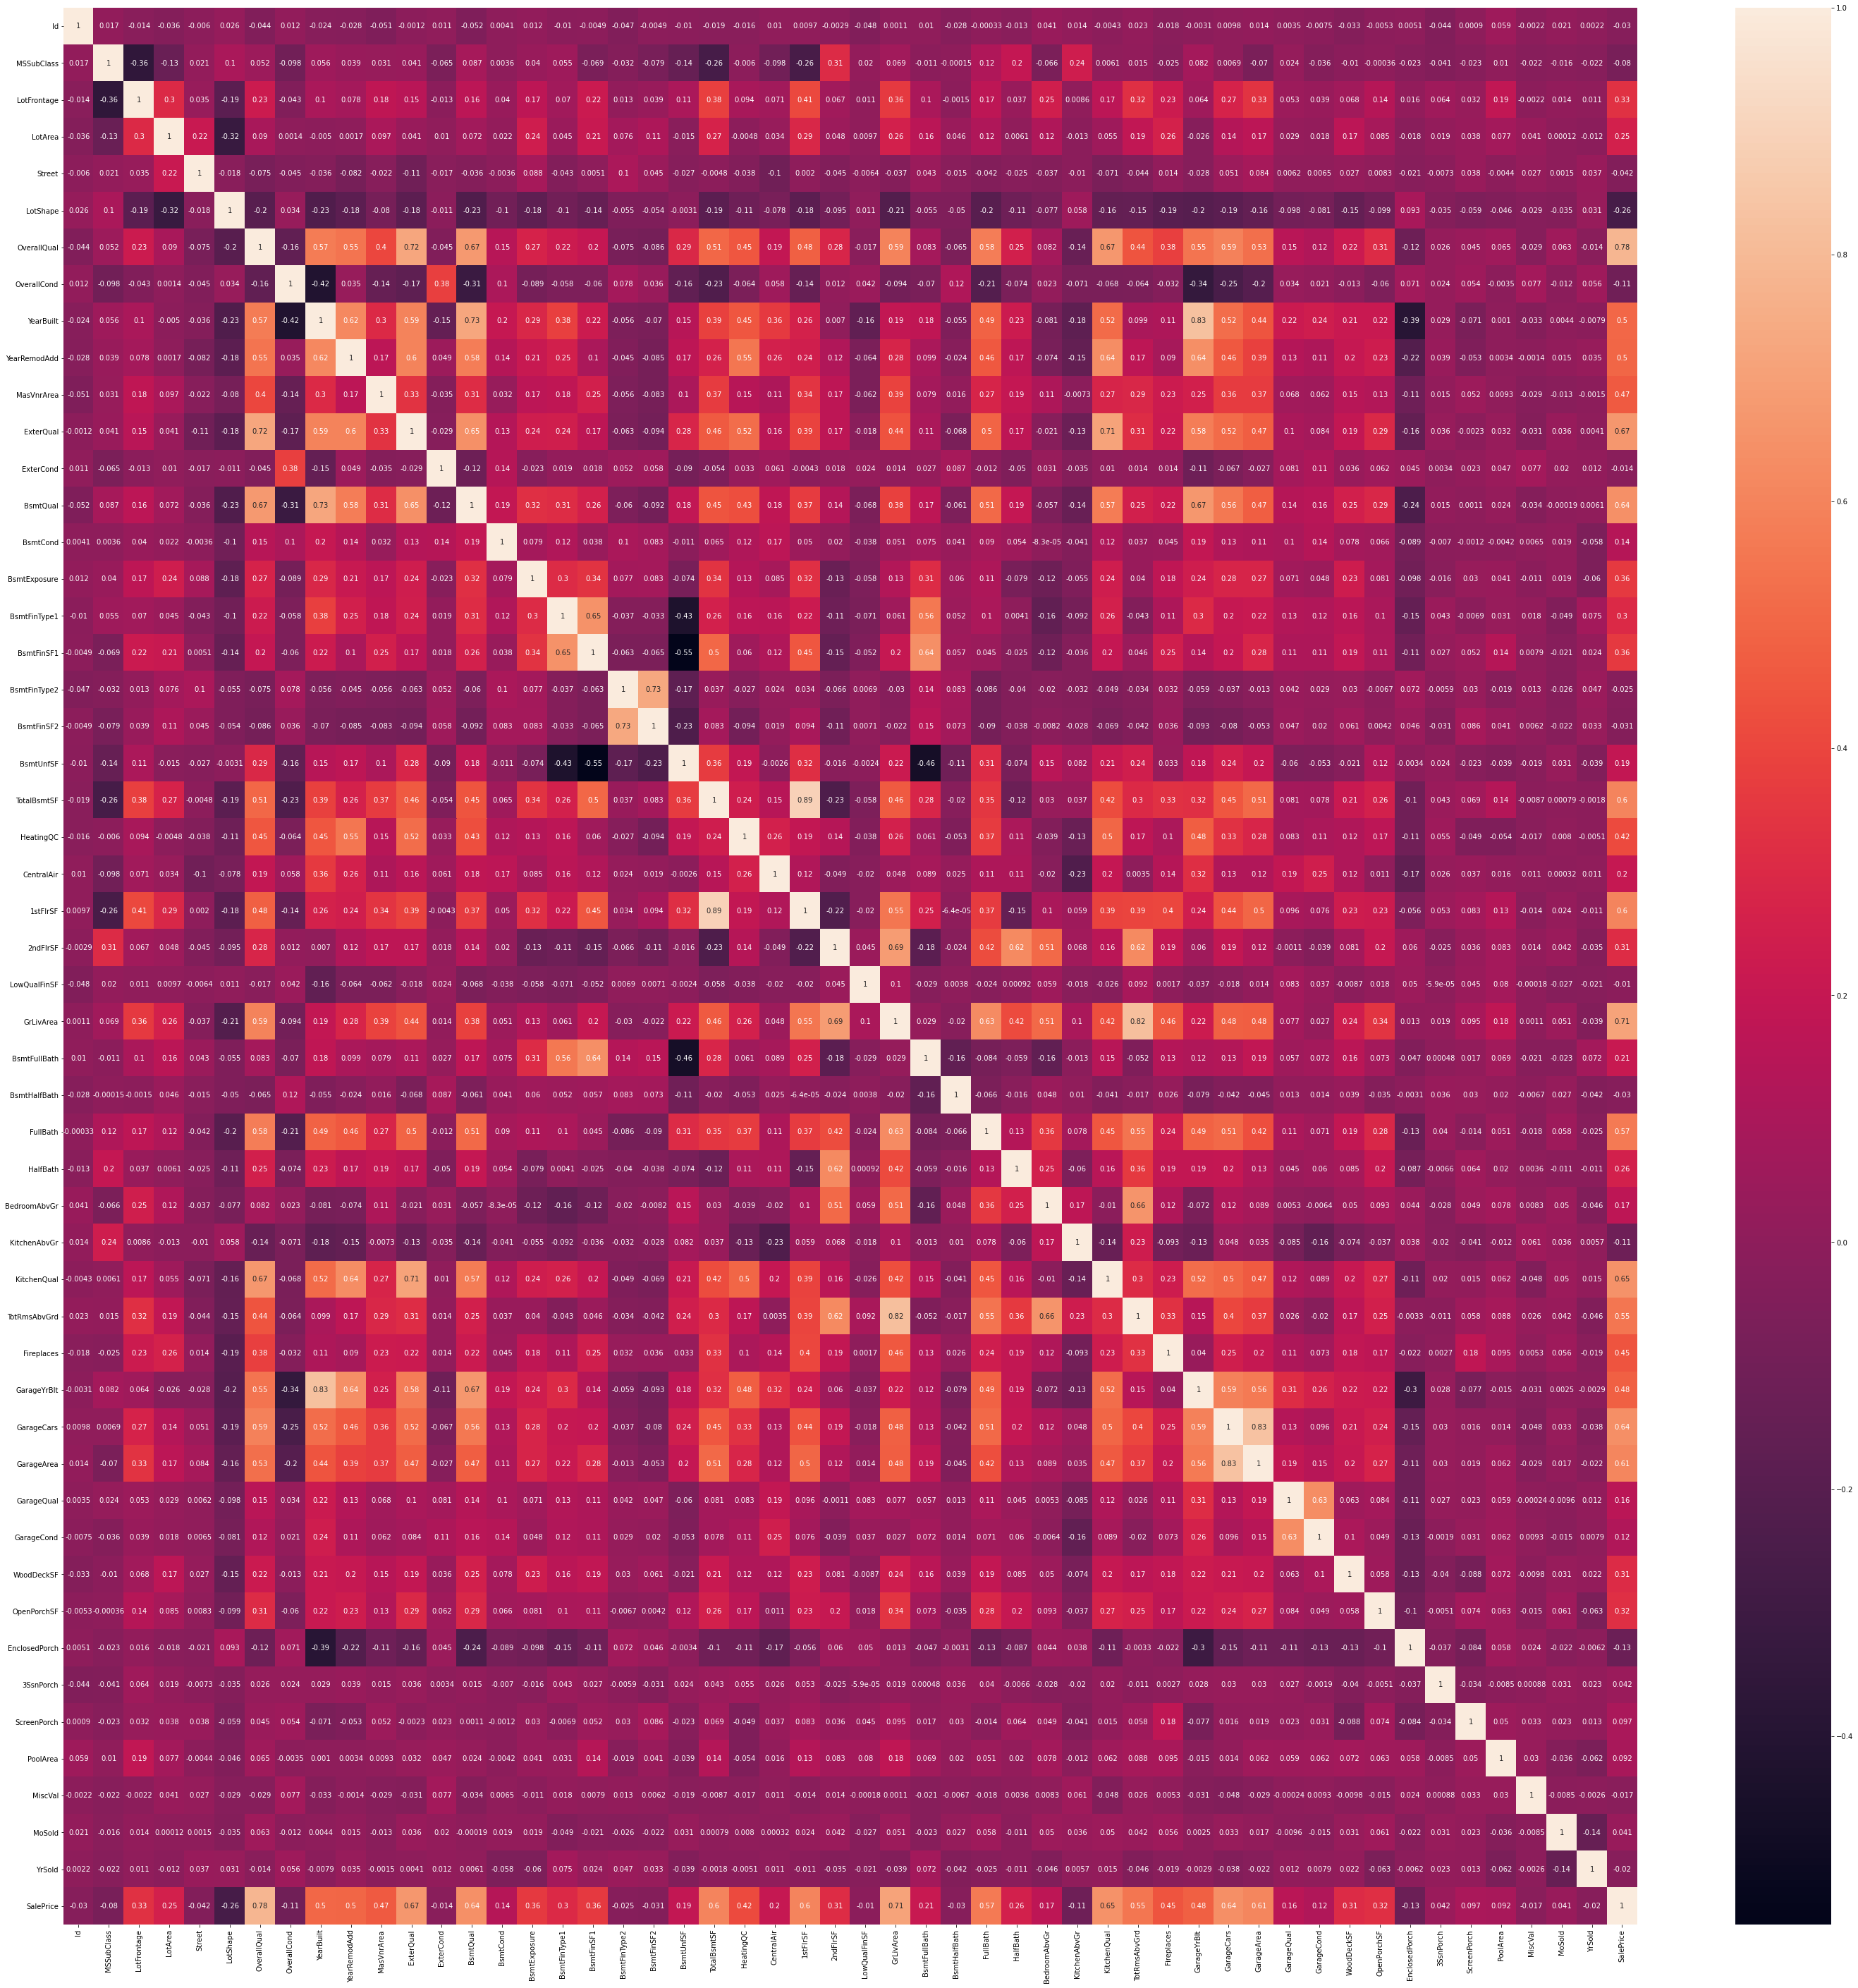

In [205]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(train_clean.corr(),annot = True)
plt.show()

In [285]:
#ist of highly correlated variables. These varibles are selected since there correlation ith SalePrice s lesser and other variables can effectively consider their effects.
high_corr = ['ExterQual', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea' ]

In [286]:
#Dropping these variable from train and test data

X_test = X_test.drop(['ExterQual', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea' ], 1)
X_train = X_train.drop(['ExterQual', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea' ], 1)

# Feature Engineering

In [287]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [288]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12 )             # running RFE
rfe = rfe.fit(X_train, y_train)

In [289]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 88),
 ('LotArea', False, 12),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 63),
 ('MasVnrArea', False, 68),
 ('ExterCond', False, 92),
 ('BsmtQual', False, 40),
 ('BsmtCond', False, 151),
 ('BsmtExposure', False, 96),
 ('BsmtFinType1', False, 140),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 157),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 137),
 ('CentralAir', False, 67),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 110),
 ('BsmtHalfBath', False, 128),
 ('FullBath', False, 47),
 ('HalfBath', False, 97),
 ('BedroomAbvGr', False, 11),
 ('KitchenAbvGr', False, 5),
 ('KitchenQual', False, 8),
 ('Fireplaces', False, 69),
 ('GarageCars', False, 20),
 ('GarageQual', False, 38),
 ('GarageCond', False, 138),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 65),
 ('E

In [290]:
# Features included in futher analysis
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'RoofMatl_Tar&Grv', 'Exterior1st_BrkComm'],
      dtype='object')

In [291]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)

# Model Building and Evaluation

## Ridge and Lasso Regression 

In [296]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
X_train_new =X_train[col]

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [298]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [345]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 87208.81105066  52004.92691365  74704.6875756   26167.23687726
  13238.09125716   6401.73374495  41982.66335619  39669.43840871
  39741.71101356  59320.95015819  -3687.5717658  -20442.7949598 ]


In [346]:
X_test.shape

(328, 180)

In [347]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test[col])



In [348]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8317104805498858
0.8099703839737946
295185984973.6954
139268705390.72815
385864032.64535344
424599711.55709803


## Lasso

In [333]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [334]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [349]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [350]:
lasso.coef_

array([ 93021.93453783,  55253.51799136,  76326.72310407,  19378.50537786,
         6248.08948744,     -0.        ,  45667.84299884,      0.        ,
            0.        , 111038.74862347,     -0.        ,     -0.        ])

In [351]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8309409054207004
0.8097771305091521
296535847955.4313
139410336786.9065
387628559.4188644
425031514.59422714


In [352]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)      8.317105e-01      8.309409e-01
1   R2 Score (Test)      8.099704e-01      8.097771e-01
2       RSS (Train)      2.951860e+11      2.965358e+11
3        RSS (Test)      1.392687e+11      1.394103e+11
4       MSE (Train)      1.964342e+04      1.968828e+04
5        MSE (Test)      2.060582e+04      2.061629e+04

## Lets observe the changes in the coefficients after regularization

In [340]:
betas = pd.DataFrame(index=X_train_new.columns)

In [341]:
betas.rows = X_train_new.columns

In [342]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [343]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
OverallQual          81834.459736   91531.866569
OverallCond          44818.658890   48774.125634
YearBuilt            71872.971500   73917.639158
BsmtFinSF1           25940.324305   18027.278898
BsmtFinSF2           11927.915341    1596.494809
BsmtUnfSF             6638.492039      -0.000000
TotalBsmtSF          41066.732171   44807.496098
1stFlrSF             38451.303400       0.000000
2ndFlrSF             38684.828510       0.000000
GrLivArea            58248.084943  108273.196116
RoofMatl_Tar&Grv     -2185.253124      -0.000000
Exterior1st_BrkComm -13054.336016      -0.000000

In [344]:
betas.rows

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'RoofMatl_Tar&Grv', 'Exterior1st_BrkComm'],
      dtype='object')